El archivo c:\Users\bourd\source\repos\IncomeInference\data\raw\UASD-FEBRERO-2024.xlsx existe en la ruta: c:\Users\bourd\source\repos\IncomeInference\data\raw\UASD-FEBRERO-2024.xlsx
Datos guardados en c:\Users\bourd\source\repos\IncomeInference\data\clean\UASD\UASD_febrero_2024_clean.xlsx

Descripción estadística de las columnas numéricas:
                               Desde  Sueldo_bruto  Otros_ingresos  \
count                            182    182.000000      182.000000   
mean   2022-05-05 21:13:50.769230848  12661.953462       45.380659   
min              2016-08-22 00:00:00  12661.640000        0.000000   
25%              2021-10-31 18:00:00  12661.990000        0.000000   
50%              2022-04-01 00:00:00  12661.990000        0.000000   
75%              2023-04-01 00:00:00  12661.990000        0.000000   
max              2023-11-01 00:00:00  12661.990000     4129.640000   
std                              NaN      0.107316      431.706376   

       Total_ingresos      

C:\Users\bourd\AppData\Local\Temp\ipykernel_32056\2983776106.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Desde'] = pd.to_datetime(df['Desde'], errors='coerce')


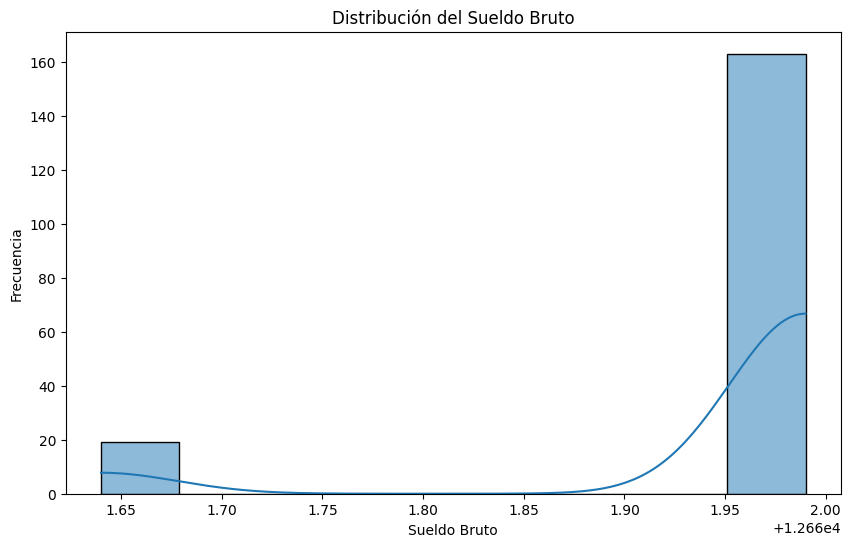

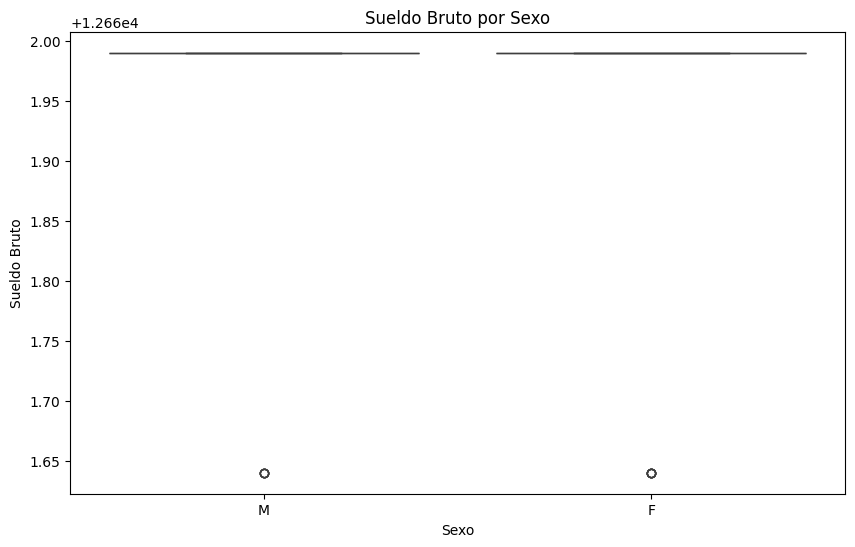

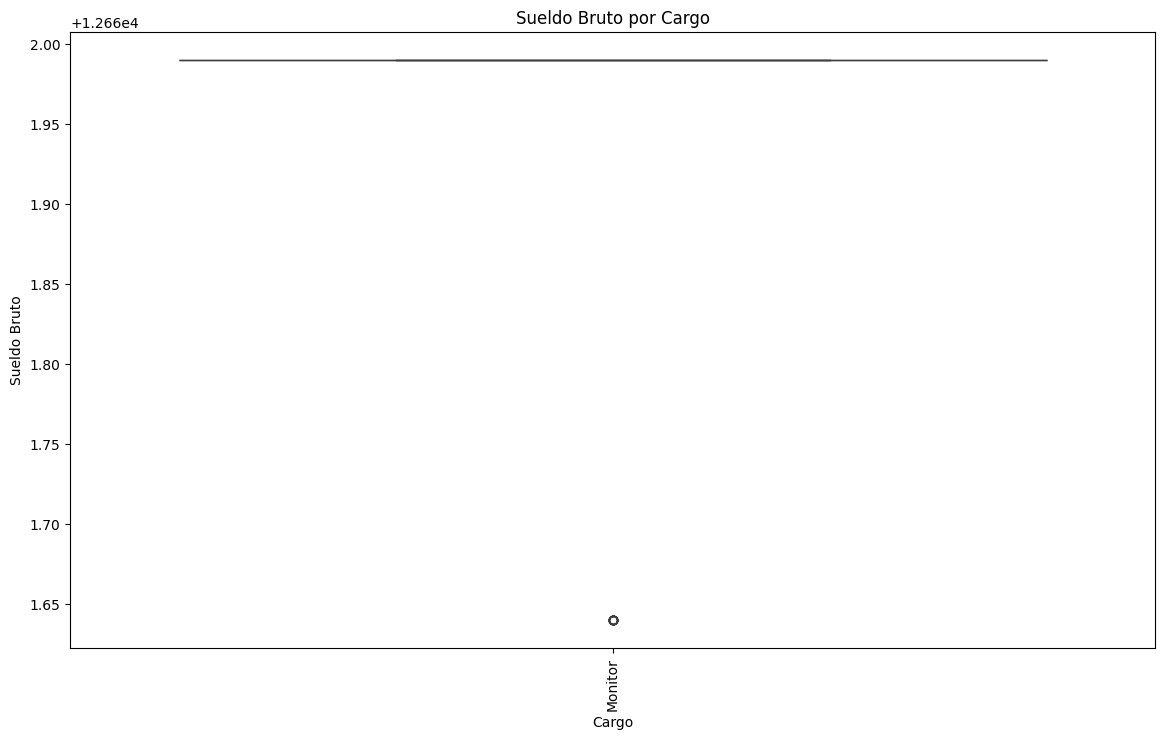

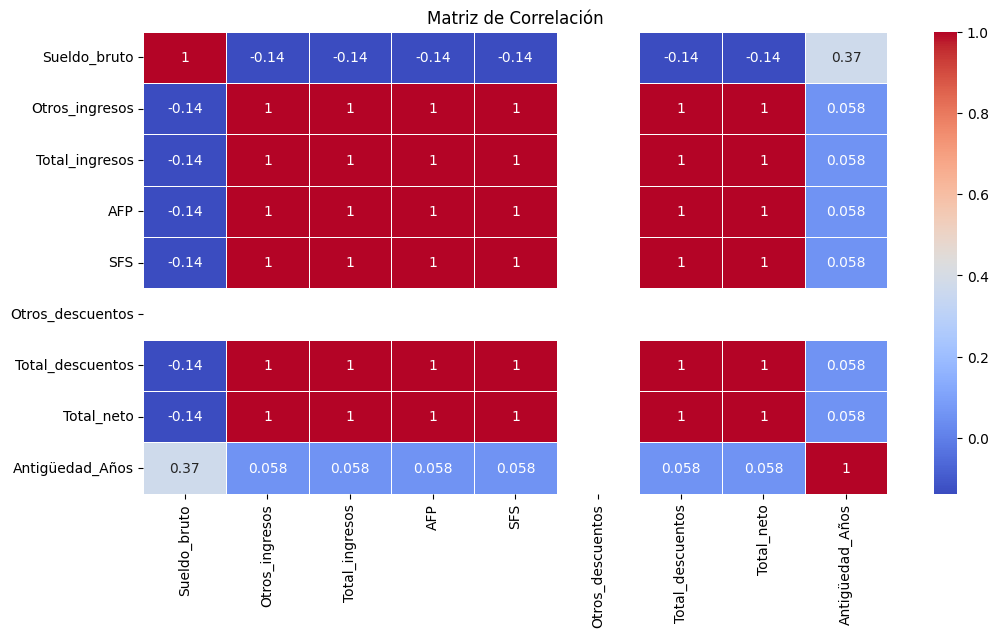


Hallazgos importantes:
1. El sueldo promedio general es 12661.95
2. El sueldo promedio de los hombres es 12661.97
3. El sueldo promedio de las mujeres es 12661.96
4. El cargo con el mayor sueldo promedio es 'Monitor' con un sueldo promedio de 12661.95
5. El cargo con el menor sueldo promedio es 'Monitor' con un sueldo promedio de 12661.95


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
ruta_excel = 'c:\\Users\\bourd\\source\\repos\\IncomeInference\\data\\raw\\UASD-FEBRERO-2024.xlsx'

# Verificar si el archivo existe
if os.path.exists(ruta_excel):
    print(f"El archivo {ruta_excel} existe en la ruta: {ruta_excel}")
    
    # Leer el archivo Excel, saltando las primeras filas innecesarias
    df = pd.read_excel(ruta_excel, skiprows=2)
    
    # Renombrar columnas de acuerdo a la estructura identificada
    df.columns = [
        'Num', 'Sexo', 'Nombre_apellido', 'Departamento', 'Funcion_o_puesto',
        'Estado', 'Desde', 'Sueldo_bruto', 'Otros_ingresos', 'Total_ingresos',
        'AFP', 'SFS', 'Otros_descuentos', 'Total_descuentos', 'Total_neto'
    ]
    
    # Eliminar filas vacías o irrelevantes si es necesario (esto puede depender de la estructura específica)
    df = df.dropna(subset=['Nombre_apellido'])
    
    # Convertir la columna 'Desde' a tipo datetime
    df['Desde'] = pd.to_datetime(df['Desde'], errors='coerce')

    # Crear nueva característica: antigüedad en años
    df['Antigüedad_Años'] = (pd.Timestamp('now') - df['Desde']).dt.days / 365.25

    # Convertir columnas numéricas a tipo float
    cols_to_convert = ['Sueldo_bruto', 'Otros_ingresos', 'Total_ingresos', 'AFP', 'SFS', 'Otros_descuentos', 'Total_descuentos', 'Total_neto']
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    
    # Eliminar filas con valores no numéricos
    df = df.dropna(subset=cols_to_convert)

    # Obtener el directorio actual
    current_dir = os.getcwd()
    
    # Guardar en un archivo Excel limpio para revisión
    output_path = os.path.abspath(os.path.join(current_dir, '../../data/clean/UASD/UASD_febrero_2024_clean.xlsx'))
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_excel(output_path, index=False)
    print(f"Datos guardados en {output_path}")

    # Análisis exploratorio de datos (EDA)
    # Descripción estadística de las columnas numéricas
    print("\nDescripción estadística de las columnas numéricas:")
    print(df.describe())

    # Calcular estadísticas adicionales
    sueldo_promedio = df['Sueldo_bruto'].mean()
    sueldo_mediana = df['Sueldo_bruto'].median()
    sueldo_minimo = df['Sueldo_bruto'].min()
    sueldo_maximo = df['Sueldo_bruto'].max()
    sueldo_desviacion_estandar = df['Sueldo_bruto'].std()

    print(f"\nSueldo Bruto Promedio: {sueldo_promedio}")
    print(f"Sueldo Bruto Mediana: {sueldo_mediana}")
    print(f"Sueldo Bruto Mínimo: {sueldo_minimo}")
    print(f"Sueldo Bruto Máximo: {sueldo_maximo}")
    print(f"Sueldo Bruto Desviación Estándar: {sueldo_desviacion_estandar}")

    # Sueldo promedio por Cargo
    sueldo_promedio_por_cargo = df.groupby('Funcion_o_puesto')['Sueldo_bruto'].mean()
    print("\nSueldo Bruto Promedio por Cargo:")
    print(sueldo_promedio_por_cargo)

    # Sueldo promedio por Sexo
    sueldo_promedio_por_sexo = df.groupby('Sexo')['Sueldo_bruto'].mean()
    print("\nSueldo Bruto Promedio por Sexo:")
    print(sueldo_promedio_por_sexo)

    # Visualización de distribuciones
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sueldo_bruto'], kde=True)
    plt.title('Distribución del Sueldo Bruto')
    plt.xlabel('Sueldo Bruto')
    plt.ylabel('Frecuencia')
    plt.show()

    # Análisis de distribuciones en conjunto con otras variables
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sexo', y='Sueldo_bruto', data=df)
    plt.title('Sueldo Bruto por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Sueldo Bruto')
    plt.show()

    # Sueldo Bruto por Cargo
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Funcion_o_puesto', y='Sueldo_bruto', data=df)
    plt.xticks(rotation=90)
    plt.title('Sueldo Bruto por Cargo')
    plt.xlabel('Cargo')
    plt.ylabel('Sueldo Bruto')
    plt.show()

    # Matriz de correlación utilizando solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(12, 6))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()

    # Presentación de hallazgos importantes
    print("\nHallazgos importantes:")
    print(f"1. El sueldo promedio general es {sueldo_promedio:.2f}")
    print(f"2. El sueldo promedio de los hombres es {sueldo_promedio_por_sexo.get('M', 'N/A'):.2f}")
    print(f"3. El sueldo promedio de las mujeres es {sueldo_promedio_por_sexo.get('F', 'N/A'):.2f}")
    cargo_con_mayor_sueldo = sueldo_promedio_por_cargo.idxmax()
    cargo_con_menor_sueldo = sueldo_promedio_por_cargo.idxmin()
    print(f"4. El cargo con el mayor sueldo promedio es '{cargo_con_mayor_sueldo}' con un sueldo promedio de {sueldo_promedio_por_cargo.max():.2f}")
    print(f"5. El cargo con el menor sueldo promedio es '{cargo_con_menor_sueldo}' con un sueldo promedio de {sueldo_promedio_por_cargo.min():.2f}")

else:
    print(f"El archivo {ruta_excel} no se encontró en la ruta: {ruta_excel}")
